<a href="https://colab.research.google.com/github/Wejdan999/T55/blob/main/Data_Cleaning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount ('/content/drive')
%cd '/content/drive/My Drive/T5/week 1/day3'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/T5/week 1/day3


# Loading the dataset

In [3]:
df=pd.read_csv('Titanic-Dataset.csv')

# Handling Null Values

In [4]:
# Check for null values (1 line)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Fill null values for 'Embarked' with the mode(1 line)
df['Embarked'].fillna (df['Embarked'].mode, inplace=True)
df['Embarked'].isna().sum()

0

In [6]:
# Fill null values for 'Cabin' with the mode(1 line)
df['Cabin'].fillna (df['Cabin'].mode, inplace=True)
df['Cabin'].isna().sum()

0

In [7]:
df['Age'].fillna (df['Age'].mean , inplace=True)
df['Age'].isna().sum()

0

In [8]:
# Drop rows with null values in 'Cabin'
df3 = df.dropna(subset=['Cabin'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [9]:
df3.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Handling Duplicates

In [10]:
# Check for duplicates (1 line)
df.duplicated().sum()

# Drop duplicates if any (1 line)



0

# Handling Outliers

<Axes: ylabel='Fare'>

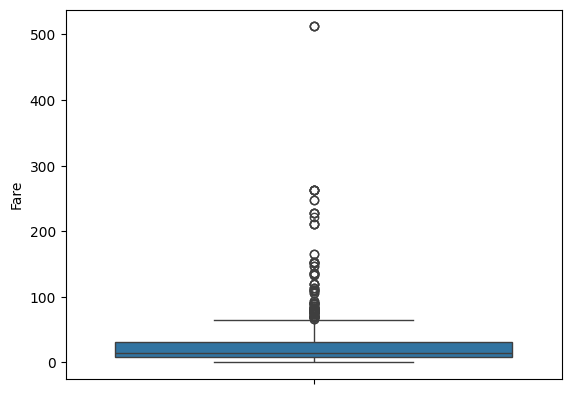

In [11]:
import seaborn as sns
sns.boxplot(df['Fare'])

In [12]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Fare' using the remove_outilers function (1 line)
df2 = remove_outliers(df, 'Fare')

<Axes: ylabel='Fare'>

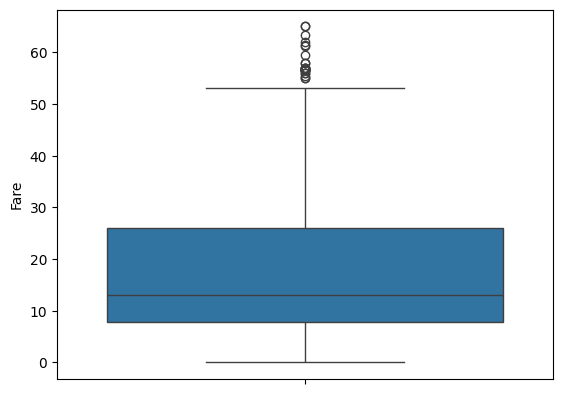

In [13]:
sns.boxplot(df2['Fare'])

# Scaling and Normalization

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Min-Max scaling for 'Age' (2 lines)

scaler = MinMaxScaler()
df['Age']=scaler.fit_transform(df[['Age']])






0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888         NaN
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64

In [12]:
# Standard scaling for 'Fare' (2 lines)

ST_Scaler=StandardScaler()
df['Fare']= ST_Scaler.fit_transform(df[['Fare']])
df['Fare']


0     -0.502445
1      0.786845
2     -0.488854
3      0.420730
4     -0.486337
         ...   
886   -0.386671
887   -0.044381
888   -0.176263
889   -0.044381
890   -0.492378
Name: Fare, Length: 891, dtype: float64

# Encoding Categorical Variables

In [4]:
# One-hot encoding for 'Embarked' and 'Sex' (1 line)
print(df,"\n")
one_hot_encoded_df = pd.get_dummies (df, columns=['Embarked'])
print(one_hot_encoded_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [6]:
print(df,"\n")
one_hot_encoded_df = pd.get_dummies (df, columns=['Sex'])
print(one_hot_encoded_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 